In [2]:
#reading the file from DDSM breast cancer image dataset
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inception/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/ddsm-mammography/cv10_labels.npy
/kaggle/input/ddsm-mammography/test10_labels.npy
/kaggle/input/ddsm-mammography/training10_1/training10_1.tfrecords
/kaggle/input/ddsm-mammography/cv10_data/cv10_data.npy
/kaggle/input/ddsm-mammography/test10_data/test10_data.npy
/kaggle/input/ddsm-mammography/training10_3/training10_3.tfrecords
/kaggle/input/ddsm-mammography/training10_2/training10_2.tfrecords
/kaggle/input/ddsm-mammography/training10_0/training10_0.tfrecords
/kaggle/input/ddsm-mammography/training10_4/training10_4.tfrecords
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426013102412536473840491086280519425818/1-223.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780/2-089.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.165685420116551754300711621441

# IMPORTING ALL THE STATEMENTS

In [3]:
import pandas as pd, numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')
dataset_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset'

In [4]:
import tensorflow 
import keras  
import skimage
from skimage import io 
import random 
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# READING ALL THE PATH FROM DATASET

In [5]:
df = pd.read_csv(f'{dataset_dir}/csv/dicom_info.csv')
df['image_path'] = df.image_path.apply(lambda x: x.replace('CBIS-DDSM', dataset_dir))
df.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  /kaggle/input/cbis-ddsm-breast-cancer-image-da...              NaN   
1  /kaggle/input/cbis-ddsm-breast-cancer-image-da...              NaN   
2  /kaggle/input/cbis-ddsm-breast-cancer-image-da...              NaN   
3  /kaggle/input/cbis-ddsm-breast-cancer-image-da...              NaN   
4  /kaggle/input/cbis-ddsm-breast-cancer-image-da...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

# IMAGE PREPROCESSING

* # Grayscale conversion
* # Normalisation
* # Data Augmentation and Image standardization

In [6]:
def show_img(path):
    img = cv2.imread(path,0)
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap='bone')

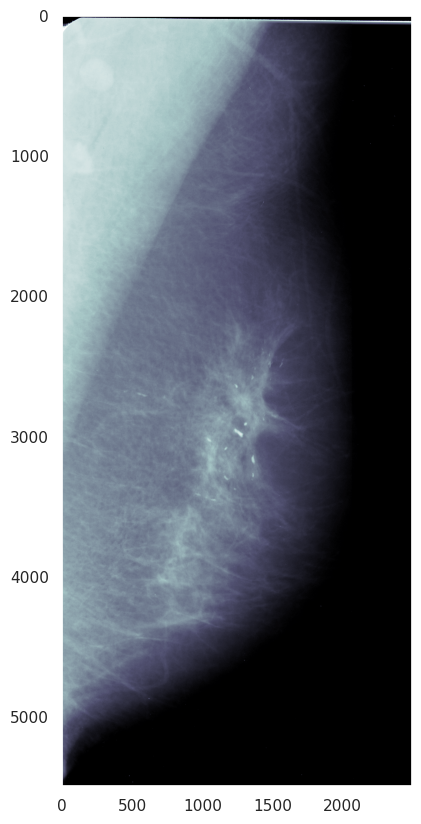

In [7]:
show_img(df.image_path.iloc[11])

# GRAY SCALE CONVERSION

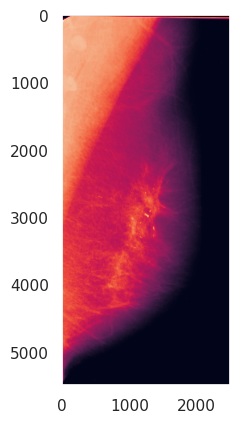

In [8]:
image=io.imread(df.image_path.iloc[11])

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

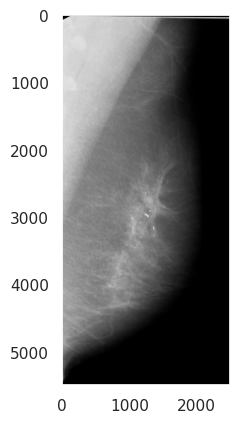

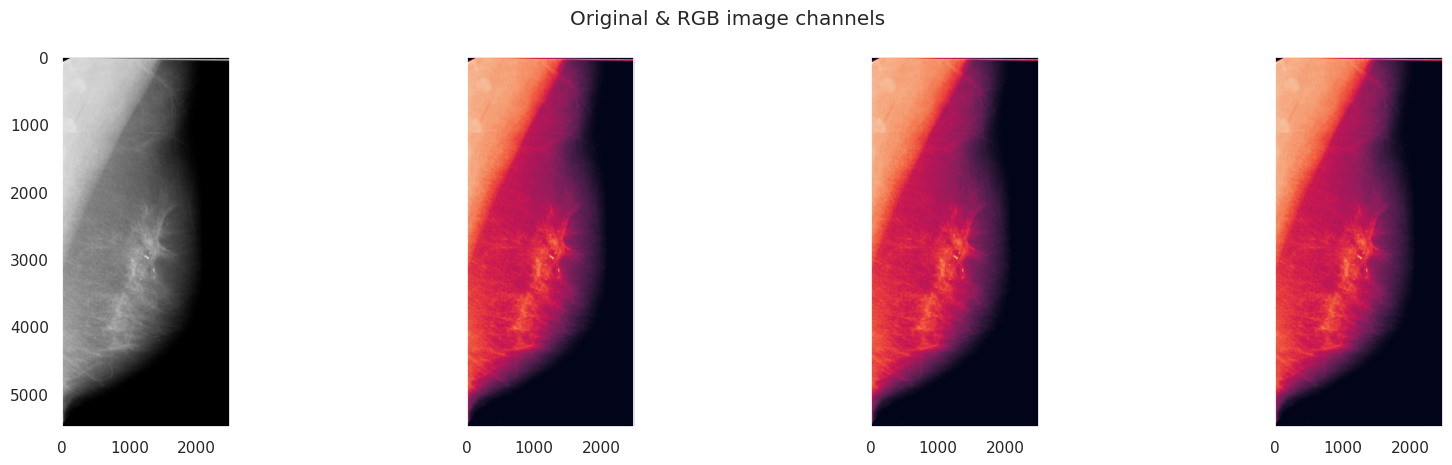

In [9]:
image=cv2.imread(df.image_path.iloc[11])
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

# NORMALIZATION

In [8]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

NameError: name 'gray_image' is not defined

# IMAGE STANDARDIZATION

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = io.imread(df.image_path.iloc[11])
samples = expand_dims(image, 0)

# data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200],brightness_range=[0.5,2.0],featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

# SHOWING IMAGE AS A GRID

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

def show_grid(files, row=3, col=3):
    grid_files = random.sample(files, row*col)
    images = []
    for image_path in tqdm(grid_files):
        img = cv2.resize(cv2.imread(image_path), dsize=(512,512))
        images.append(img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111, nrows_ncols=(col, row),axes_pad=0.05 )
    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

100%|██████████| 12/12 [00:00<00:00, 66.71it/s]


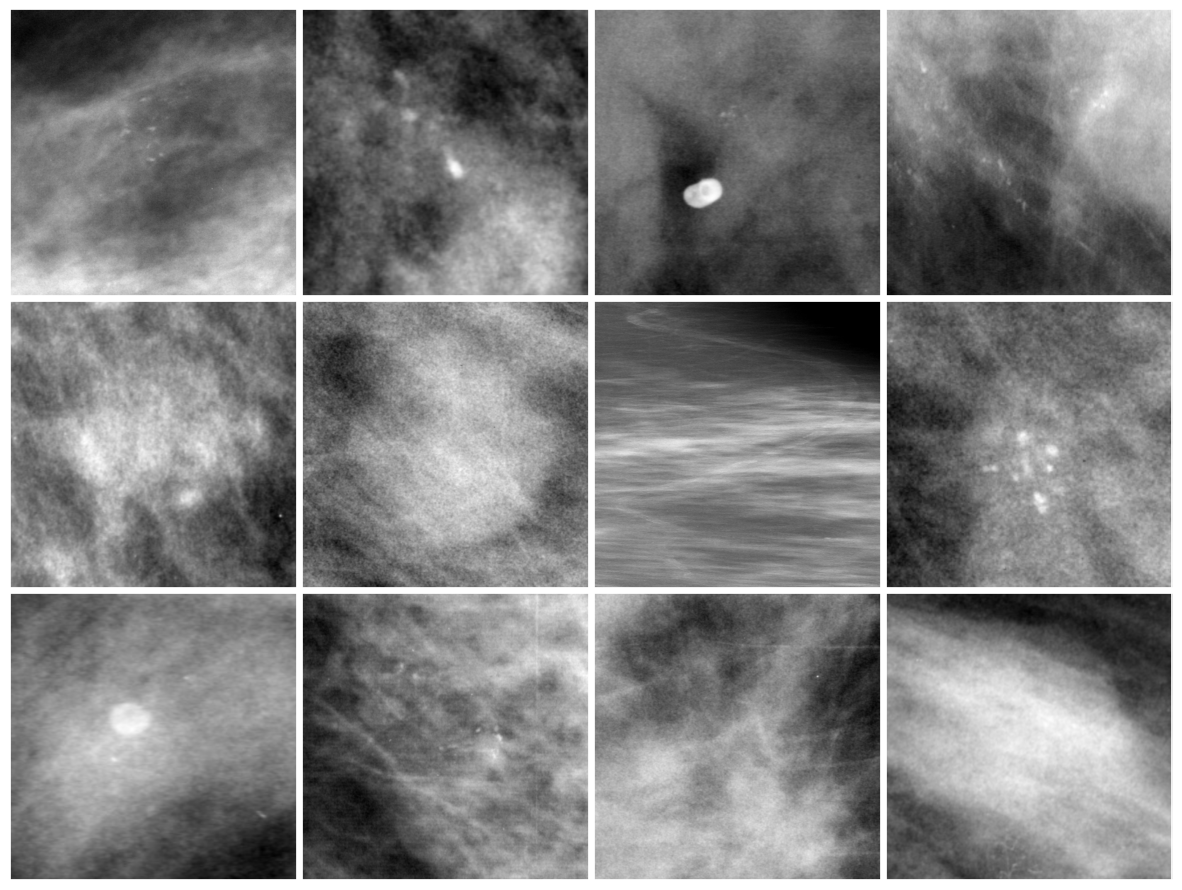

In [16]:
show_grid(df[df.SeriesDescription=='cropped images'].image_path.tolist(), row=4)

# LOGISTIC REGRESSION

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Path to the DDSM dataset
#dataset_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132"  # Replace with the actual path

# List all image filenames
#image_filenames = [filename for filename in os.listdir(dataset_path) if filename.endswith(".jpg")]
image_filenames=df[df.SeriesDescription=='cropped images'].image_path.tolist()
data =pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")
if not image_filenames:
    print("No image files found in the specified directory.")
    exit()

# Load and preprocess images
images = []
labels = []
i=0
for i, filename in enumerate(image_filenames):
    if i >= len(data['pathology']):
        break
    #image_path = os.path.join(dataset_path, filename)
    image_path=image_filenames[i]
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error loading image: {image_path}")
        continue
    
    # Preprocess the image (resize, normalize, etc.)
    image = cv2.resize(image, (128, 128))  # Example resizing
    images.append(image)
    
    if data['pathology'][i] == "MALIGNANT":
        label = 1
    else:
        label = 0
    labels.append(label)
if not images or not labels:
    print("No images or labels were loaded.")
    exit()
    
X = np.array(images)
y = np.array(labels)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Flatten and normalize the pixel values
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import pickle

# Specify the file name for the pickle file
file_name = 'logistic_regression.pkl'

# Save the model to the pickle file
with open(file_name, 'wb') as file:
    pickle.dump(model, file)

In [14]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
model = pickle.load(open('/kaggle/working/logistic_regression.pkl', 'rb'))

# Load and preprocess the input image
image = Image.open("/kaggle/input/image-breast-cancer/1-172.jpg")  # Replace with the actual image path
 # Preprocess the image (resize and flatten)
target_size = (128, 128)  # Change this to the input size your model was trained on
image = image.resize(target_size)
image = np.array(image)
image = image.flatten().reshape(1, -1)  # Flatten and reshape the image to 1D array with 2 features

    # Make predictions using the loaded logistic regression model
predicted_class = model.predict(image)

print(f"Predicted Class: {predicted_class[0]}")

Predicted Class: 1


#  LOGISTIC REGRESSION : ACCURACY = 0.52

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Ridge Logistic Regression
#Limited-memory Broyden–Fletcher–Goldfarb–Shanno
ridge_logreg = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')  # 'l2' indicates Ridge regularization
ridge_logreg.fit(X_train_scaled, y_train)
ridge_predictions = ridge_logreg.predict(X_test_scaled)
ridge_accuracy = accuracy_score(y_test, ridge_predictions)

# Lasso Logistic Regression
lasso_logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')  # 'l1' indicates Lasso regularization
lasso_logreg.fit(X_train_scaled, y_train)
lasso_predictions = lasso_logreg.predict(X_test_scaled)
lasso_accuracy = accuracy_score(y_test, lasso_predictions)

print("Ridge Logistic Regression Accuracy : ", ridge_accuracy)
print("Lasso Logistic Regression Accuracy : ", lasso_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ridge Logistic Regression Accuracy :  0.5484848484848485
Lasso Logistic Regression Accuracy :  0.5454545454545454


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# PLOTTING THE LOGISTIC REGRESSION MODEL

[[ -80.76247317  -59.13256113]
 [  29.75206488 -120.01815242]
 [-109.01113266 -131.09209433]
 ...
 [ -71.61558351    6.30724187]
 [  21.58310552  164.99545274]
 [ -85.33049015  -46.96078808]]
[[ 2.29572216e+01 -1.94256718e+01]
 [ 7.00510857e+01 -8.08961776e+01]
 [ 5.12377711e+01  4.60802710e+01]
 [ 3.26067219e+01  1.56302376e+01]
 [-2.19309673e+02 -3.71718753e+01]
 [-1.06359995e+02  5.70719289e+01]
 [ 1.04346836e+02  2.85981489e+01]
 [-6.01932082e+01 -2.28019539e+01]
 [-3.74813078e+01 -4.49406040e+01]
 [-9.82089864e+00 -1.07479414e+02]
 [-2.08190502e+01  2.52402207e+01]
 [ 1.17778398e+02 -1.39109779e+02]
 [ 1.20815834e+02 -1.72573493e+01]
 [ 2.92472239e+01  9.99581397e+01]
 [ 1.89053770e+01 -8.16229844e+01]
 [ 5.22677237e+01 -3.59195897e+01]
 [-3.65841284e+01  1.66141270e+01]
 [-1.93260056e+01  2.03475535e+01]
 [ 1.93091880e+01 -1.51139931e+00]
 [-4.62532431e+01  5.11751016e+01]
 [ 7.71179196e+01 -2.08243515e+01]
 [ 1.52752814e+02  1.08188983e+01]
 [ 4.64480098e+01  4.17204524e+01]
 [-

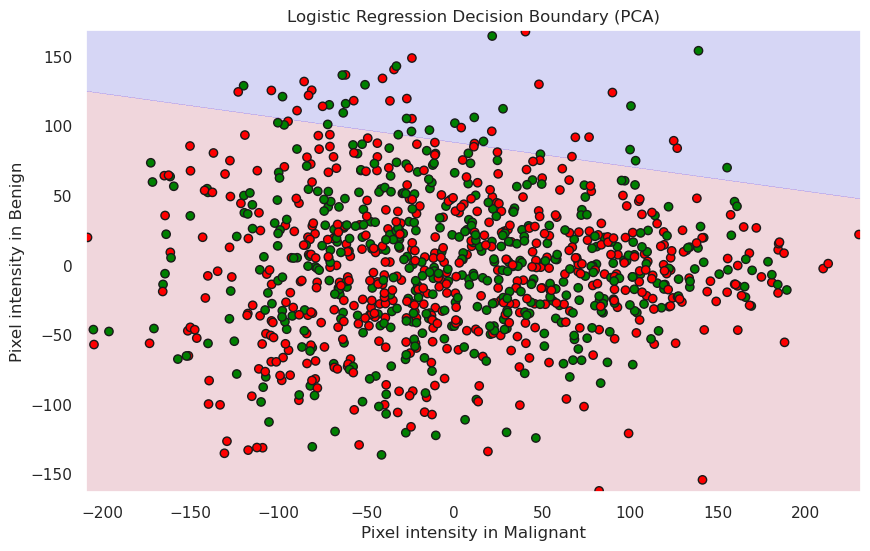

In [22]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Perform PCA for dimensionality reduction
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
print(X_train_pca)
X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca)
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_pca, y_train)

# Create a meshgrid to plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#008000'])

# Plot decision boundary and training data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_points, edgecolors='k')
plt.xlabel('Pixel intensity in Malignant')
plt.ylabel('Pixel intensity in Benign')
plt.title('Logistic Regression Decision Boundary (PCA)')
plt.show()

# Rest of your code (predicting accuracy etc.)


# PLOTTING THE CURVE

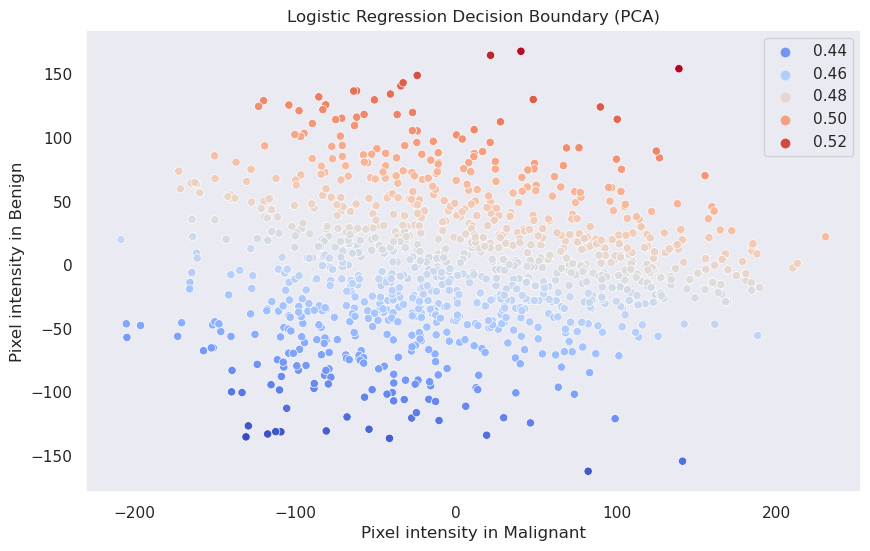

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for each point in the training data
y_pred_prob = model.predict_proba(X_train_pca)[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_pred_prob, palette='coolwarm')
plt.xlabel('Pixel intensity in Malignant')
plt.ylabel('Pixel intensity in Benign')
plt.title('Logistic Regression Decision Boundary (PCA)')
#plt.colorbar(label='Predicted Probability (Class 1)')
plt.show()


# PLOTTING THE FEATURES IN 3D HAVING LOGISTIC REGRESSION DECISION BOUNDARY OF APPROXIMATELY 0.47

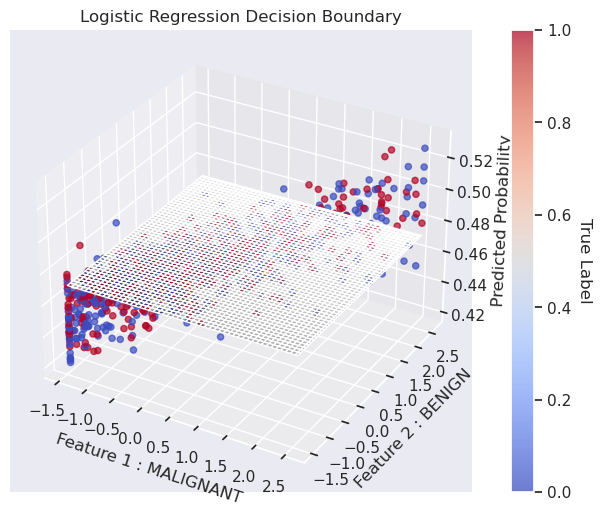

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Get predicted probabilities for each point in the training data
y_pred_prob = model.predict_proba(X_train_pca)[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_pred_prob, c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel('Feature 1 : MALIGNANT')
plt.ylabel('Feature 2 : BENIGN')
ax.set_zlabel('Predicted Probability')
plt.title('Logistic Regression Decision Boundary')

# Plot the sigmoid curve
x_vals = np.linspace(np.min(X_train_scaled[:, 0]), np.max(X_train_scaled[:, 0]), 100)
y_vals = np.linspace(np.min(X_train_scaled[:, 1]), np.max(X_train_scaled[:, 1]), 100)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
sigmoid_vals = 1 / (1 + np.exp(-model.coef_[0][0] * X_vals - model.coef_[0][1] * Y_vals - model.intercept_[0]))
ax.plot_surface(X_vals, Y_vals, sigmoid_vals, cmap='gray', alpha=0.3)

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('True Label', rotation=270, labelpad=15)

plt.show()

# **DENSETNET - KNN - SVM**

In [2]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter
import IPython.display as display

sn.set()

from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter

sn.set()
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

In [7]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))
    
    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }   

    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    for image_features in full_dataset:
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299])        
        image=image.numpy()
        image=cv2.resize(image,(100,100))
        image=cv2.merge([image,image,image])        
        #plt.imshow(image)
        images.append(image)
        labels.append(image_features['label_normal'].numpy())


In [8]:
filenames=['../input/ddsm-mammography/training10_3/training10_3.tfrecords',
          '../input/ddsm-mammography/training10_1/training10_1.tfrecords',
           '../input/ddsm-mammography/training10_2/training10_2.tfrecords',
           '../input/ddsm-mammography/training10_3/training10_3.tfrecords',
           '../input/ddsm-mammography/training10_4/training10_4.tfrecords']
          

for file in filenames:
    read_data(file)
    
print(len(images))
print(len(labels))

Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None

In [9]:
X=np.array(images)
y=np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021,shuffle=True,stratify=y)

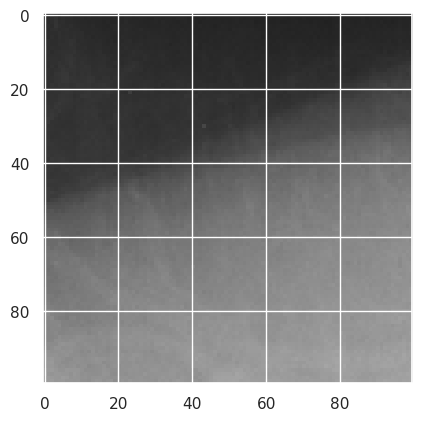

In [10]:
plt.imshow(x_train[0])

In [57]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

print(x_train[0].shape)

(100, 100, 3)


# **DENSENET**

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

# Define the local file path to the DenseNet169 weights
weights_path = '/kaggle/input/inception/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5'  # Adjust the path as needed

# Create the DenseNet169 base model
base_model = DenseNet169(input_shape=(100, 100, 3), weights=None, include_top=False)

# Load the weights from the local file path
base_model.load_weights(weights_path)

# Build the feature extraction model
x = base_model.output
predictions = Flatten()(x)
model_feat = Model(inputs=base_model.input, outputs=predictions)

# Assuming x_train and x_test are your datasets
train_features = model_feat.predict(x_train)
test_features = model_feat.predict(x_test)

# Print the model summary
model_feat.summary()


350/350 [==============================] - 181s 516ms/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (No

In [38]:
import pickle
# Specify the file name for the pickle file
file_name = 'Densenet169_model.pkl'

# Save the model to the pickle file
with open(file_name, 'wb') as file:
    pickle.dump(base_model, file)


In [12]:
train_features[0].shape

(14976,)

In [13]:
x_train_acc, x_val_acc, y_train_acc, y_val_acc = train_test_split(train_features,y_train,
                                                  test_size = 0.2,
                                                  stratify = y_train,
                                                  shuffle = True,
                                                  random_state = 42)
X_test,y_test=test_features,y_test

In [14]:
print('length X_train:', len(x_train_acc))
print('length y_train:', len(y_train_acc))

print('length X_val:',  len(x_val_acc))
print('length y_val:', len(y_val_acc))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

length X_train: 35766
length y_train: 35766
length X_val: 8942
length y_val: 8942
length X_test: 11177
length y_test: 11177


In [23]:
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
         ]
classifiers = [
    KNeighborsClassifier(),
    SVC(),
        ]

zipped_clf = zip(names,classifiers)

In [24]:
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    train_confusion_matrix = confusion_matrix(y_train,y_pred_train)
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
    val_confusion_matrix = confusion_matrix(y_val,y_pred_val)
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),4)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),4)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),4)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),4) 
    test_confusion_matrix = confusion_matrix(y_test,y_pred_test)
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(train_accuracy))
    print("F1_score : {}".format(train_F1))
    print("Cohen Kappa Score : {} ".format(train_kappa))
    print("Recall : {}".format(train_recall))
    print("Precision : {}".format(train_precision))
    print("Confusion Matrix :\n {}".format(train_confusion_matrix))
    
    print()
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(val_accuracy))
    print("F1_score : {}".format(val_F1))
    print("Cohen Kappa Score : {} ".format(val_kappa))
    print("Recall : {}".format(val_recall))
    print("Precision : {}".format(val_precision))
    print("Confusion Matrix :\n {}".format(val_confusion_matrix))
    
    print()
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Cohen Kappa Score : {} ".format(test_kappa))
    print("Recall : {}".format(test_recall))
    print("Precision : {}".format(test_precision))
    print("Confusion Matrix : {}".format(test_confusion_matrix))

    print("-"*80)
    print()

In [25]:
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('classifier', c)])
        print("Fitting {} on features ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [ ]:
classifier_comparator(x_train_acc,y_train_acc,x_val_acc,y_val_acc,X_test,y_test,classifier=zipped_clf)

Fitting K Nearest Neighbour Classifier on features 

------------------------ Train Set Metrics------------------------

accuracy : 92.81%
F1_score : 0.9214
Cohen Kappa Score : 0.6292 
Recall : 0.9281
Precision : 0.9241
Confusion Matrix :
 [[30617   463]
 [ 2107  2579]]

------------------------ Validation Set Metrics------------------------

accuracy : 89.9%
F1_score : 0.8868
Cohen Kappa Score : 0.4573 
Recall : 0.899
Precision : 0.887
Confusion Matrix :
 [[7571  200]
 [ 703  468]]

------------------------ Test Set Metrics------------------------

accuracy : 90.05%
F1_score : 0.8888
Cohen Kappa Score : 0.4683 
Recall : 0.9005
Precision : 0.889
Confusion Matrix : [[9464  249]
 [ 863  601]]
--------------------------------------------------------------------------------

Fitting SVM on features 


In [15]:
ann=Sequential()
ann.add(Dense(16,activation='relu',input_shape=x_train_acc[0].shape))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(16,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

ann.summary()

ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = ann.fit(x_train_acc, y_train_acc,validation_data=(x_val_acc,y_val_acc), epochs=15)

loss_value , accuracy = ann.evaluate(x_train_acc, y_train_acc)
print('Train_accuracy = ' + str(accuracy))
loss_value , accuracy = ann.evaluate(x_val_acc, y_val_acc)
print('Validation_accuracy = ' + str(accuracy))
loss_value , accuracy = ann.evaluate(X_test, y_test)
print('test_accuracy = ' + str(accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                239632    
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

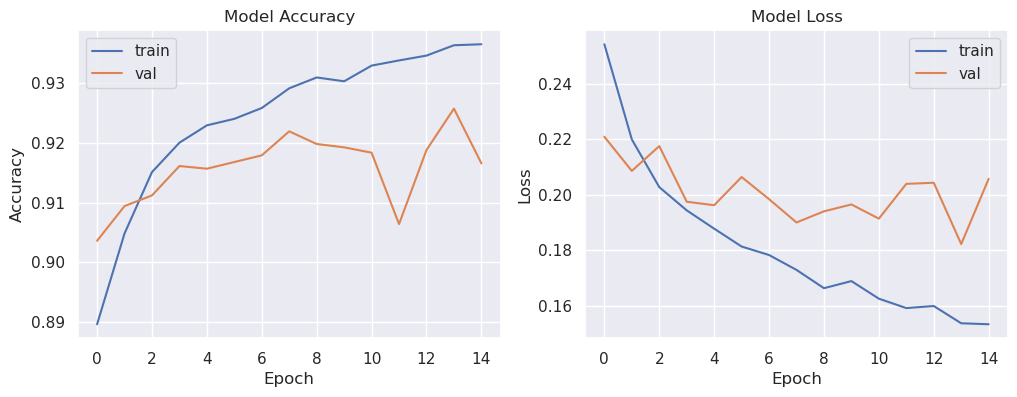

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(base_model, to_file='densenet121_model.png', show_shapes=True, show_layer_names=True)

# Plot training history (accuracy and loss)
#history = model.fit(...)  # You should provide actual training data
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.show()


In [ ]:
y_pred_prob = ann.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

target=["B","M"]
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
print('Recall:', np.round(metrics.recall_score(y_test,y_pred, average='weighted'),4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred, target_names=target))


# # **KNN**

In [17]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn.fit(x_train_acc, y_train_acc)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.31%


In [18]:
import pickle
# Specify the file name for the pickle file
file_name = 'KNN.pkl'

# Save the model to the pickle file
with open(file_name, 'wb') as file:
    pickle.dump(knn, file)


# # **SVM**

In [ ]:
# Create an SVM classifier
svm = SVC(kernel='linear')  # You can choose different kernels (e.g., linear, rbf, poly, etc.)

# Train the SVM model
svm.fit(x_train_acc, y_train_acc)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import pickle
# Specify the file name for the pickle file
file_name = 'SVM.pkl'

# Save the model to the pickle file
with open(file_name, 'wb') as file:
    pickle.dump(svm, file)

# **INCEPTION**

In [39]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, Activation
from tensorflow.keras.applications import InceptionResNetV2

# Assuming the file path where you have saved the weights
weights_path = "/kaggle/input/inception/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = InceptionResNetV2(input_shape=(100, 100, 3), include_top=False, weights=None)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(32, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Load weights from the downloaded file
model.load_weights(weights_path, by_name=True)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [41]:
import pickle
# Specify the file name for the pickle file
file_name = 'InceptionResNetV2.pkl'

# Save the model to the pickle file
with open(file_name, 'wb') as file:
    pickle.dump(base_model, file)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,shuffle=True, epochs=1, validation_split=0.2,batch_size=128,callbacks=[es])
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

350/350 [==============================] - 189s 540ms/step - loss: 0.4002 - accuracy: 0.8616
Test_loss_value = 0.4001877009868622
test_accuracy = 0.8615907430648804
